## Problem Statement:

**To help Delhivery process and understand the data coming from their data engineering pipelines and suggesting a structured approach that involves data cleaning, feature creation, data exploration, and visualization.**

In [1]:
# Importing required Packages

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
# Loading the data

df = pd.read_csv("/kaggle/input/delhivery-data/delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Basic Data Cleaning and Exploration
**Handling Missing Values**

Identify and handle missing values in the dataset.

In [3]:
# Check for missing values
length_of_df = len(df)

missing_values = df.isnull().sum()
print(missing_values)


data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


In [4]:
total_missing_values = max(missing_values)
print(f"Percentage of missing values: {(total_missing_values*100)/length_of_df}")

Percentage of missing values: 0.20225448169700483


In [5]:
#Due to low missing value percentage, to the categorical data, solution is to drop the rows
df.dropna(inplace=True, axis=0)
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

## Analyzing Dataset Structure

In [6]:
# Data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144316 non-null  object 
 1   trip_creation_time              144316 non-null  object 
 2   route_schedule_uuid             144316 non-null  object 
 3   route_type                      144316 non-null  object 
 4   trip_uuid                       144316 non-null  object 
 5   source_center                   144316 non-null  object 
 6   source_name                     144316 non-null  object 
 7   destination_center              144316 non-null  object 
 8   destination_name                144316 non-null  object 
 9   od_start_time                   144316 non-null  object 
 10  od_end_time                     144316 non-null  object 
 11  start_scan_to_end_scan          144316 non-null  float64
 12  is_cutoff            

In [7]:
df['cutoff_timestamp'] = pd.to_datetime(df['cutoff_timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144316 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  object        
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  object        
 10  od_end_time                     144316 non-null  object      

In [8]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,NaT,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [9]:
# Statistical summary
df.describe()

,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316.000000,144316.000000,140909,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,963.697698,233.561345,2018-09-23 03:15:10.623693568,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,20.000000,9.000000,2018-09-12 00:10:27,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,161.000000,22.000000,2018-09-17 19:18:34,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,451.000000,66.000000,2018-09-22 21:15:24,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,1645.000000,286.000000,2018-09-28 06:12:35,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,1038.082976,345.245823,NaN,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


## Feature Creation and Aggregation

#### Feature Extraction

Extract useful features from existing columns:

- Trip Creation Time: Extract year, month, and day.
- Source Name and Destination Name: Split into city and state.

In [10]:
# Extract features from trip_creation_time
df['trip_creation_year'] = pd.to_datetime(df['trip_creation_time']).dt.year
df['trip_creation_month'] = pd.to_datetime(df['trip_creation_time']).dt.month
df['trip_creation_day'] = pd.to_datetime(df['trip_creation_time']).dt.day

# Function to handle splitting and ensuring two parts
def split_and_expand(column):
    split_col = column.str.split('_', n=1, expand=True)
    split_col.columns = ['city', 'state']
    split_col['state'] = split_col['state'].fillna('Unknown')  # Fill missing parts with 'Unknown'
    return split_col

# Apply the function to source_name and destination_name
df[['source_city', 'source_state']] = split_and_expand(df['source_name'])
df[['destination_city', 'destination_state']] = split_and_expand(df['destination_name'])
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,segment_osrm_time,segment_osrm_distance,segment_factor,trip_creation_year,trip_creation_month,trip_creation_day,source_city,source_state,destination_city,destination_state
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,11.0,11.9653,1.272727,2018,9,20,Anand,VUNagar_DC (Gujarat),Khambhat,MotvdDPP_D (Gujarat)
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,9.0,9.7590,1.111111,2018,9,20,Anand,VUNagar_DC (Gujarat),Khambhat,MotvdDPP_D (Gujarat)
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,7.0,10.8152,2.285714,2018,9,20,Anand,VUNagar_DC (Gujarat),Khambhat,MotvdDPP_D (Gujarat)
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,12.0,13.0224,1.750000,2018,9,20,Anand,VUNagar_DC (Gujarat),Khambhat,MotvdDPP_D (Gujarat)
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,5.0,3.9153,1.200000,2018,9,20,Anand,VUNagar_DC (Gujarat),Khambhat,MotvdDPP_D (Gujarat)


In [11]:
# Calculate time taken between od_start_time and od_end_time
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])
df['time_taken'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds()


In [12]:
# Drop the original columns
df.drop(columns=['od_start_time', 'od_end_time'], inplace=True)

# Compare the difference between calculated time and start_scan_to_end_scan
df['time_difference'] = df['time_taken'] - df['start_scan_to_end_scan']


#### Aggregating Data

Aggregate data based on trip_uuid, source_center, and destination_center.

In [13]:
# Group by trip_uuid and aggregate
aggregated_df = df.groupby('trip_uuid').agg({
    # Keep sum for continuous
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'actual_distance_to_destination': 'sum',
    'osrm_distance': 'sum',
    'start_scan_to_end_scan': 'sum',
    'time_taken': 'sum',
    # Keep First occurence for categorical
    'route_type': 'first',
    'source_center': 'first',
    'destination_center': 'first',
    'trip_creation_year': 'first',
    'trip_creation_month': 'first',
    'trip_creation_day': 'first',
    'source_state': 'first',
    'destination_state': 'first',
}).reset_index()

aggregated_df.head()

,trip_uuid,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,time_taken,route_type,source_center,destination_center,trip_creation_year,trip_creation_month,trip_creation_day,source_state,destination_state
0,trip-153671041653548748,15682.0,7787.0,8860.812105,10577.7647,43659.0,2.620830e+06,FTL,IND462022AAA,IND209304AAA,2018,9,12,Trnsport_H (Madhya Pradesh),Central_H_6 (Uttar Pradesh)
1,trip-153671042288605164,399.0,210.0,240.208306,269.4308,906.0,5.479044e+04,Carting,IND572101AAA,IND561203AAB,2018,9,12,Veersagr_I (Karnataka),ChikaDPP_D (Karnataka)
2,trip-153671043369099517,112225.0,65768.0,68163.502238,89447.2488,248631.0,1.492166e+07,FTL,IND562132AAA,IND000000ACB,2018,9,12,Nelmngla_H (Karnataka),Bilaspur_HB (Haryana)
3,trip-153671046011330457,82.0,24.0,28.529648,31.6475,200.0,1.205939e+04,Carting,IND400072AAB,IND401104AAA,2018,9,12,Unknown,MiraRd_IP (Maharashtra)
4,trip-153671052974046625,556.0,207.0,239.007304,266.2914,1586.0,9.532266e+04,FTL,IND583101AAA,IND583201AAA,2018,9,12,Dc (Karnataka),Unknown


## Visual Analysis

#### Univariate Analysis

In [14]:
def plot_continuous_variable(data, variable):
    # Histogram
    sns.histplot(data[variable].dropna(), color='blue', kde=True)
    plt.title(f'Histogram of {variable}')
    plt.tight_layout()
    
def plot_categorical_variable(data, category, rotation=0):
    # Boxplot
    if len(data[category].value_counts()) > 5:
        top_5_categories = data[category].value_counts().nlargest(5).index
    # Filter the data to include only the top 5 categories
        filter_data = data[data[category].isin(top_5_categories)]
        sns.countplot(data=filter_data, x=category, palette='Set2', order=filter_data[category].value_counts().index)
        plt.xticks(rotation=rotation)
    else:
        sns.countplot(data=data, x=category, palette='Set2')
    plt.title(f'Barplot of {category}')
    plt.xlabel(category)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

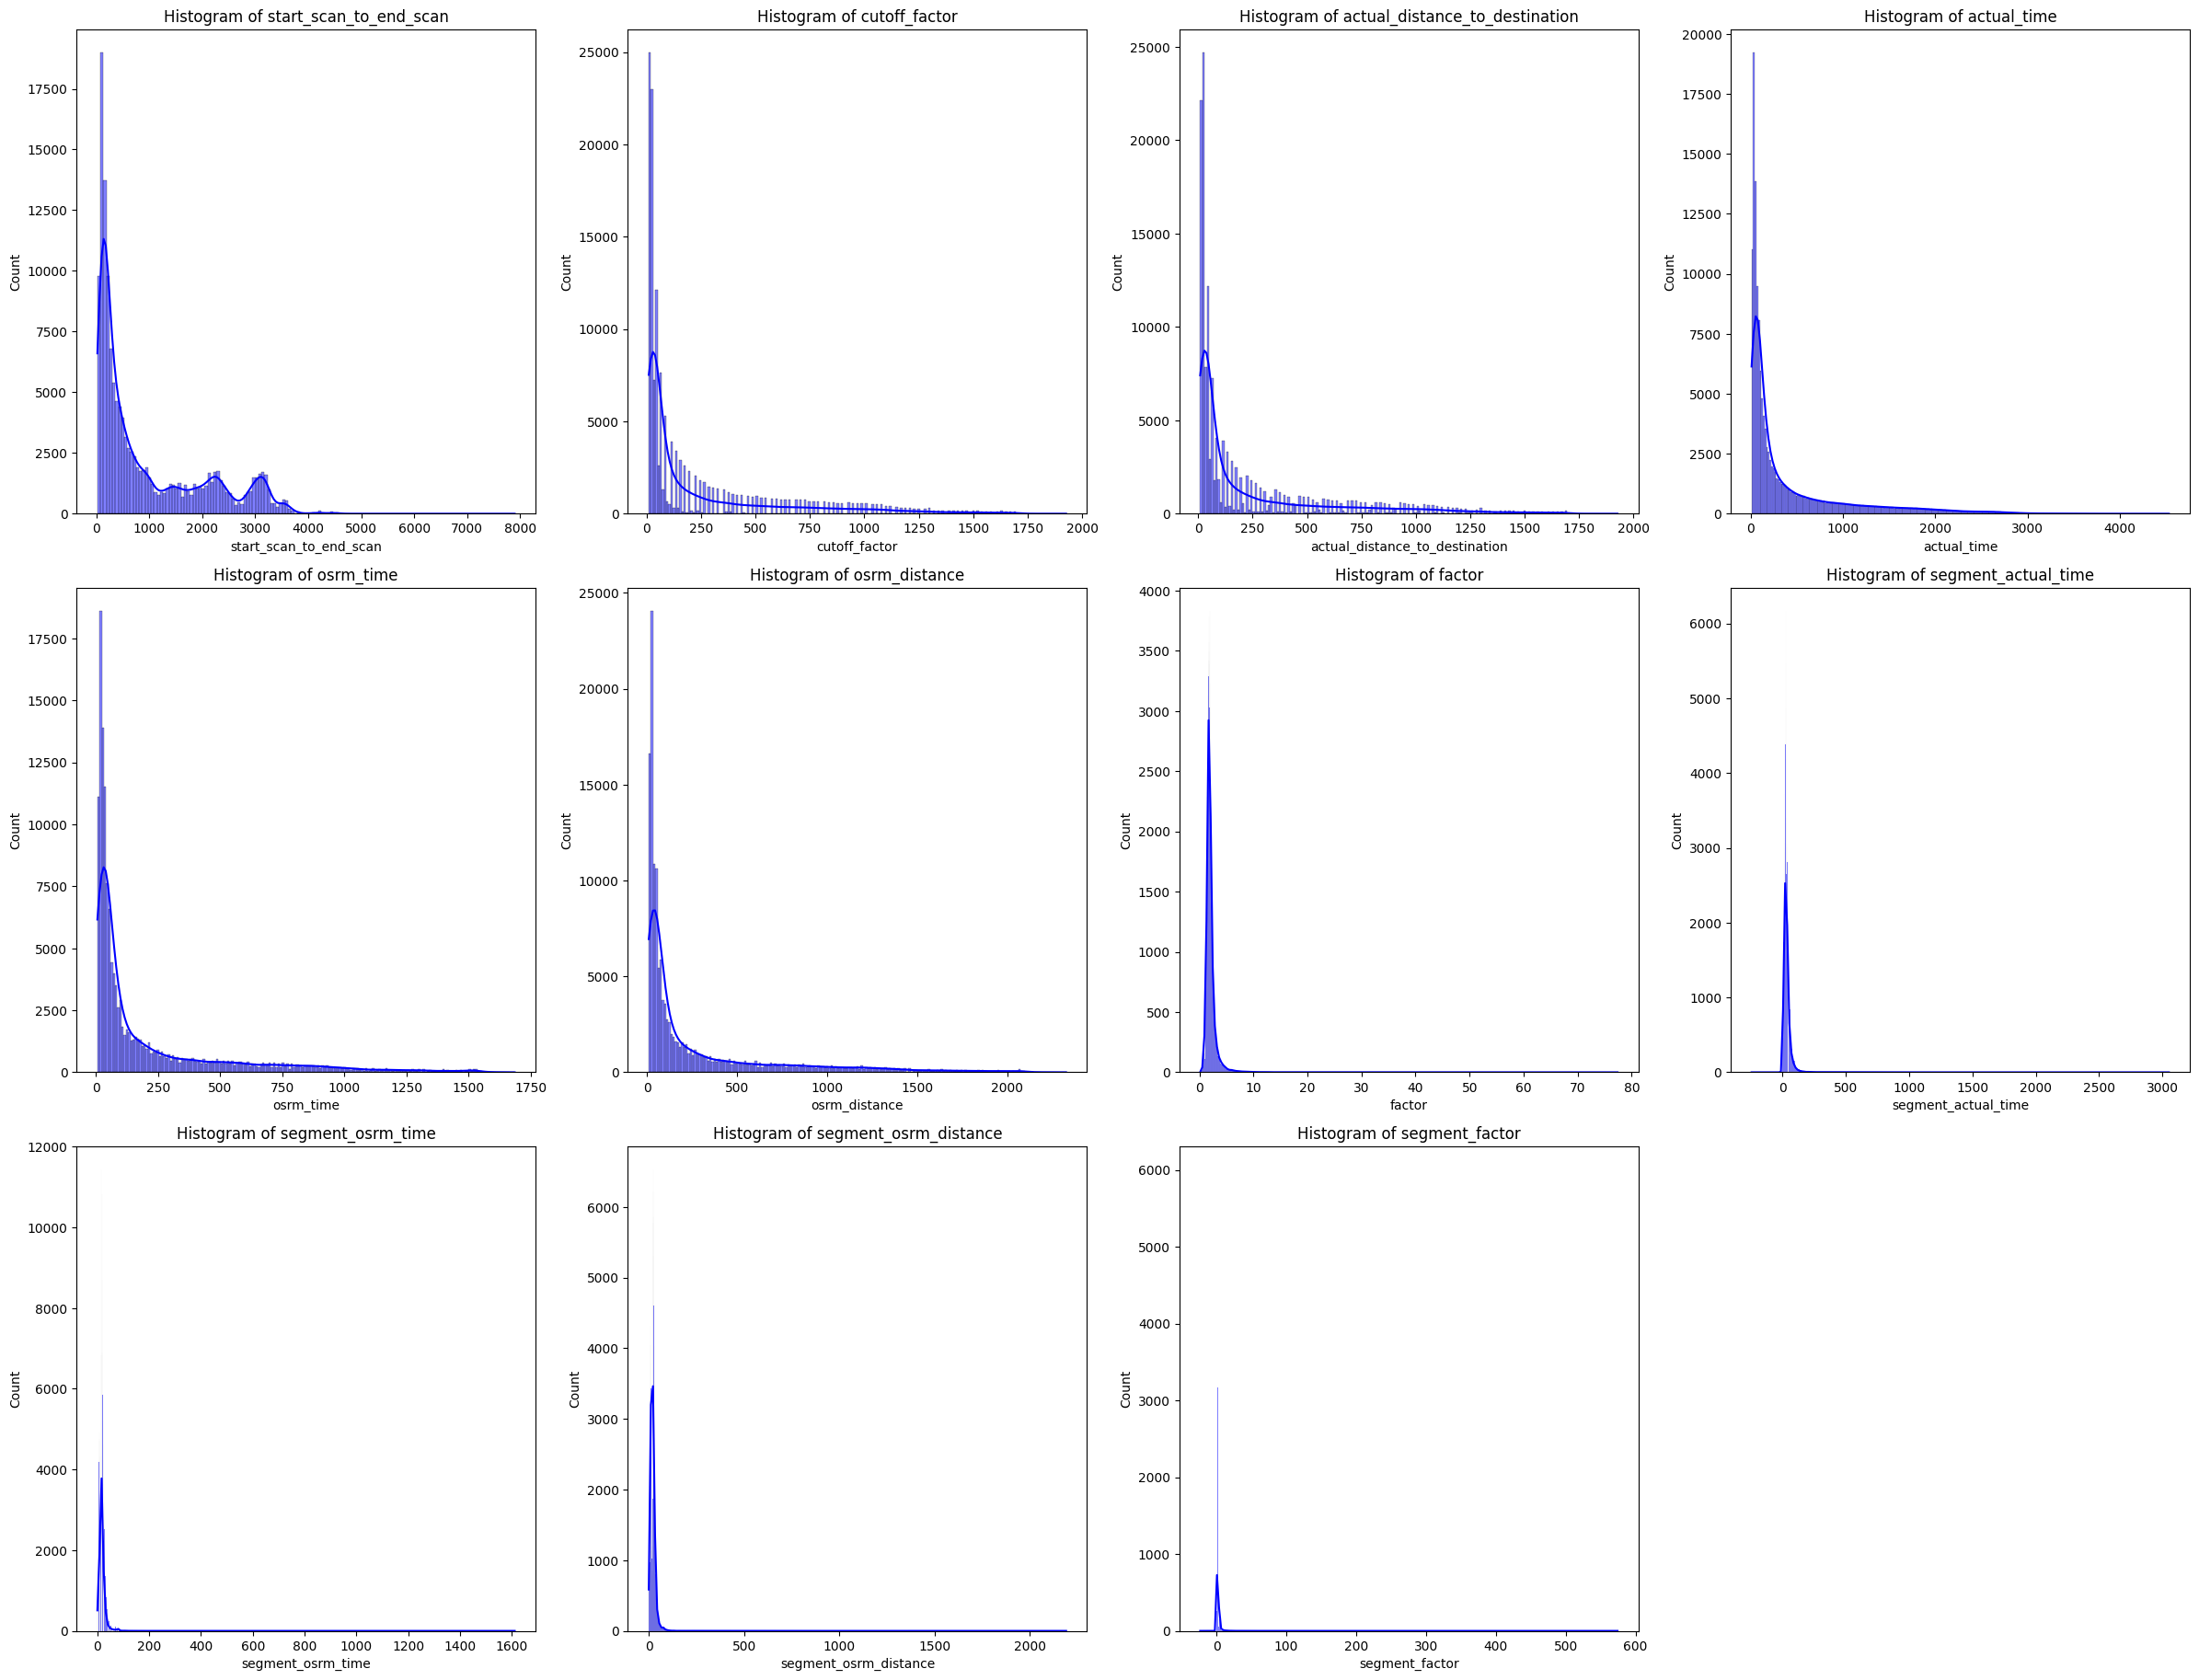

In [15]:
numeric_columns = ['start_scan_to_end_scan', 'cutoff_factor','actual_distance_to_destination', 'actual_time', 'osrm_time','osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time','segment_osrm_distance', 'segment_factor']
numeric_data = df[numeric_columns]
i = 1
plt.figure(figsize=(24, 24))
for cat in numeric_columns:
    plt.subplot(4, 4, i)
    plot_continuous_variable(df, cat)
    i += 1
plt.show()

### While most numerical data has huge range, this is highly caused due to the influence of outliers as mean and median of the data is far smaller than max_values.

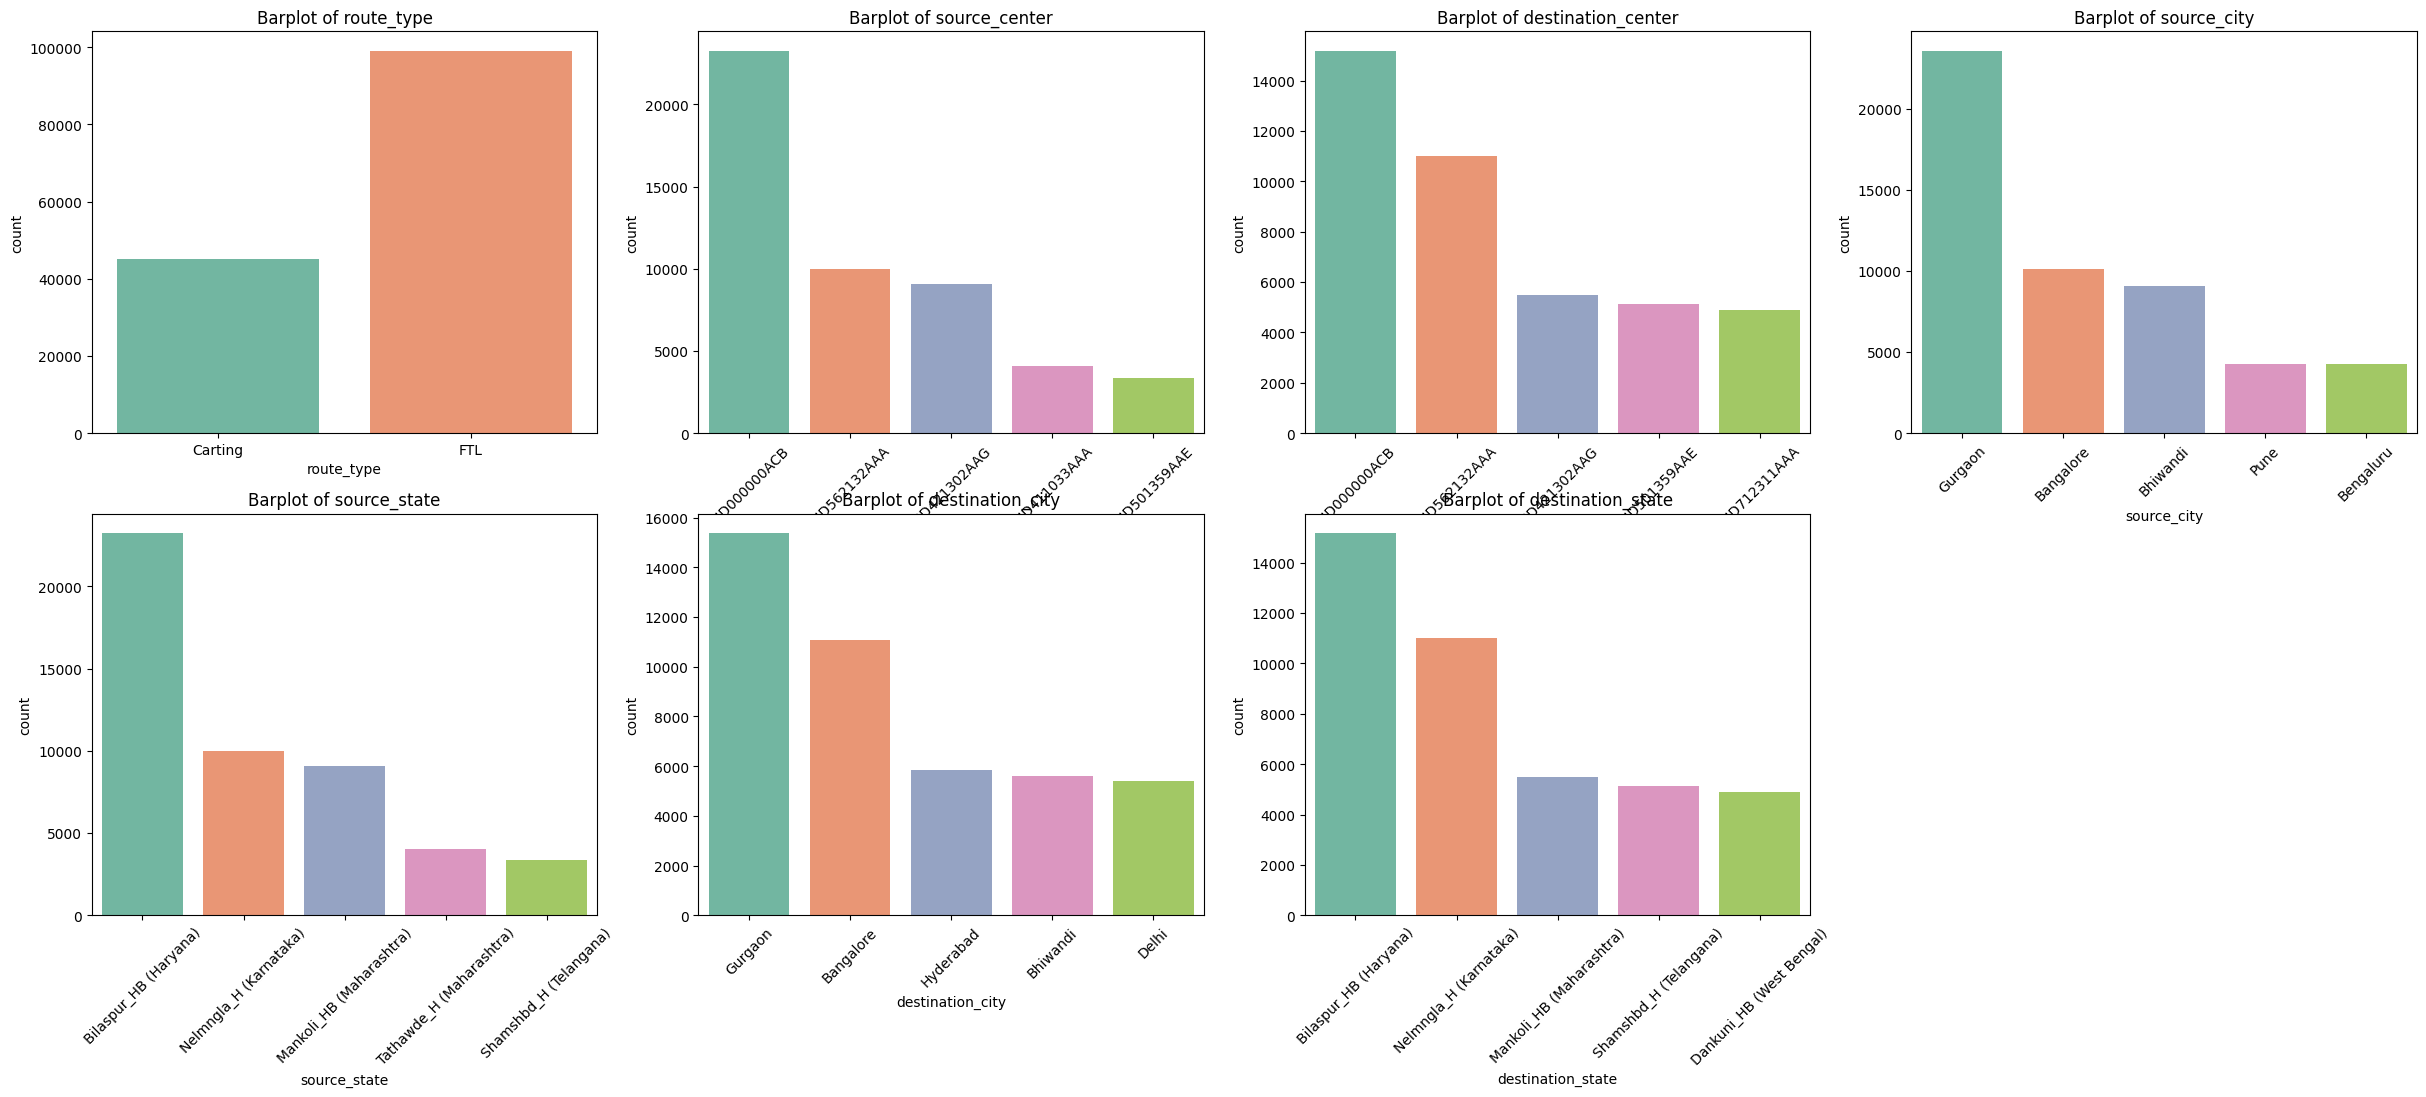

In [16]:
categorical_columns = ['route_type', 'source_center', 'destination_center', 'source_city', 'source_state', 'destination_city','destination_state']

i = 1
plt.figure(figsize=(30, 24))
for cat in categorical_columns:
    plt.subplot(4, 4, i)
    plot_categorical_variable(df, cat, rotation=45)
    i += 1
plt.show()

### Majority of the categorical values have uneven distribution among its groups.

#### Bi-variate Analysis

In [17]:
# Define a function to create the required bivariate plots for continuous-categorical variables
def plot_bivariate_plot_NC(data, category, variable):
    sns.violinplot(x=df[category].dropna(), y=df[variable].dropna())
    plt.title(f'Boxplot(Boxenplot for better understanding) of {variable} by {category}')
    plt.xlabel(category)
    plt.ylabel(variable)
    plt.tight_layout()
    plt.show()
    
def plot_bivariate_plot_CC(data, category_1, category_2, rotation=0):
    # Grouped Baxplot
    if len(data[category_1].value_counts()) > 5:
        top_5_categories = data[category_1].value_counts().nlargest(5).index
    # Filter the data to include only the top 5 categories
        filter_data = data[data[category_1].isin(top_5_categories)]
    if len(data[category_2].value_counts()) > 5:
        top_5_categories = data[category_2].value_counts().nlargest(5).index
    # Filter the data to include only the top 5 categories
        filter_data = data[data[category_2].isin(top_5_categories)]
    sns.countplot(data=filter_data, x=category_1, hue=category_2, palette='Set2', order=data[category_1].value_counts().nlargest(5).index)
    plt.xticks(rotation=rotation)
    plt.title(f'Grouped Barplot of {category_1} and {category_2}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Define a function to create the required bivariate plots for continuous-continuous variables
def plot_bivariate_plot_NN(data, variable_1, variable_2):
    # Scatterplot
    sns.scatterplot(x=variable_1, y=variable_2, data=data)
    plt.title(f'scatterPlot of {variable_1} by {variable_2}')
    plt.xlabel(variable_1)
    plt.ylabel(variable_2)


In [18]:
select_num_cols = [ 'actual_time','start_scan_to_end_scan', 'cutoff_factor','actual_distance_to_destination', 'osrm_time','osrm_distance']
select_cat_cols = ['route_type','source_state','destination_state']


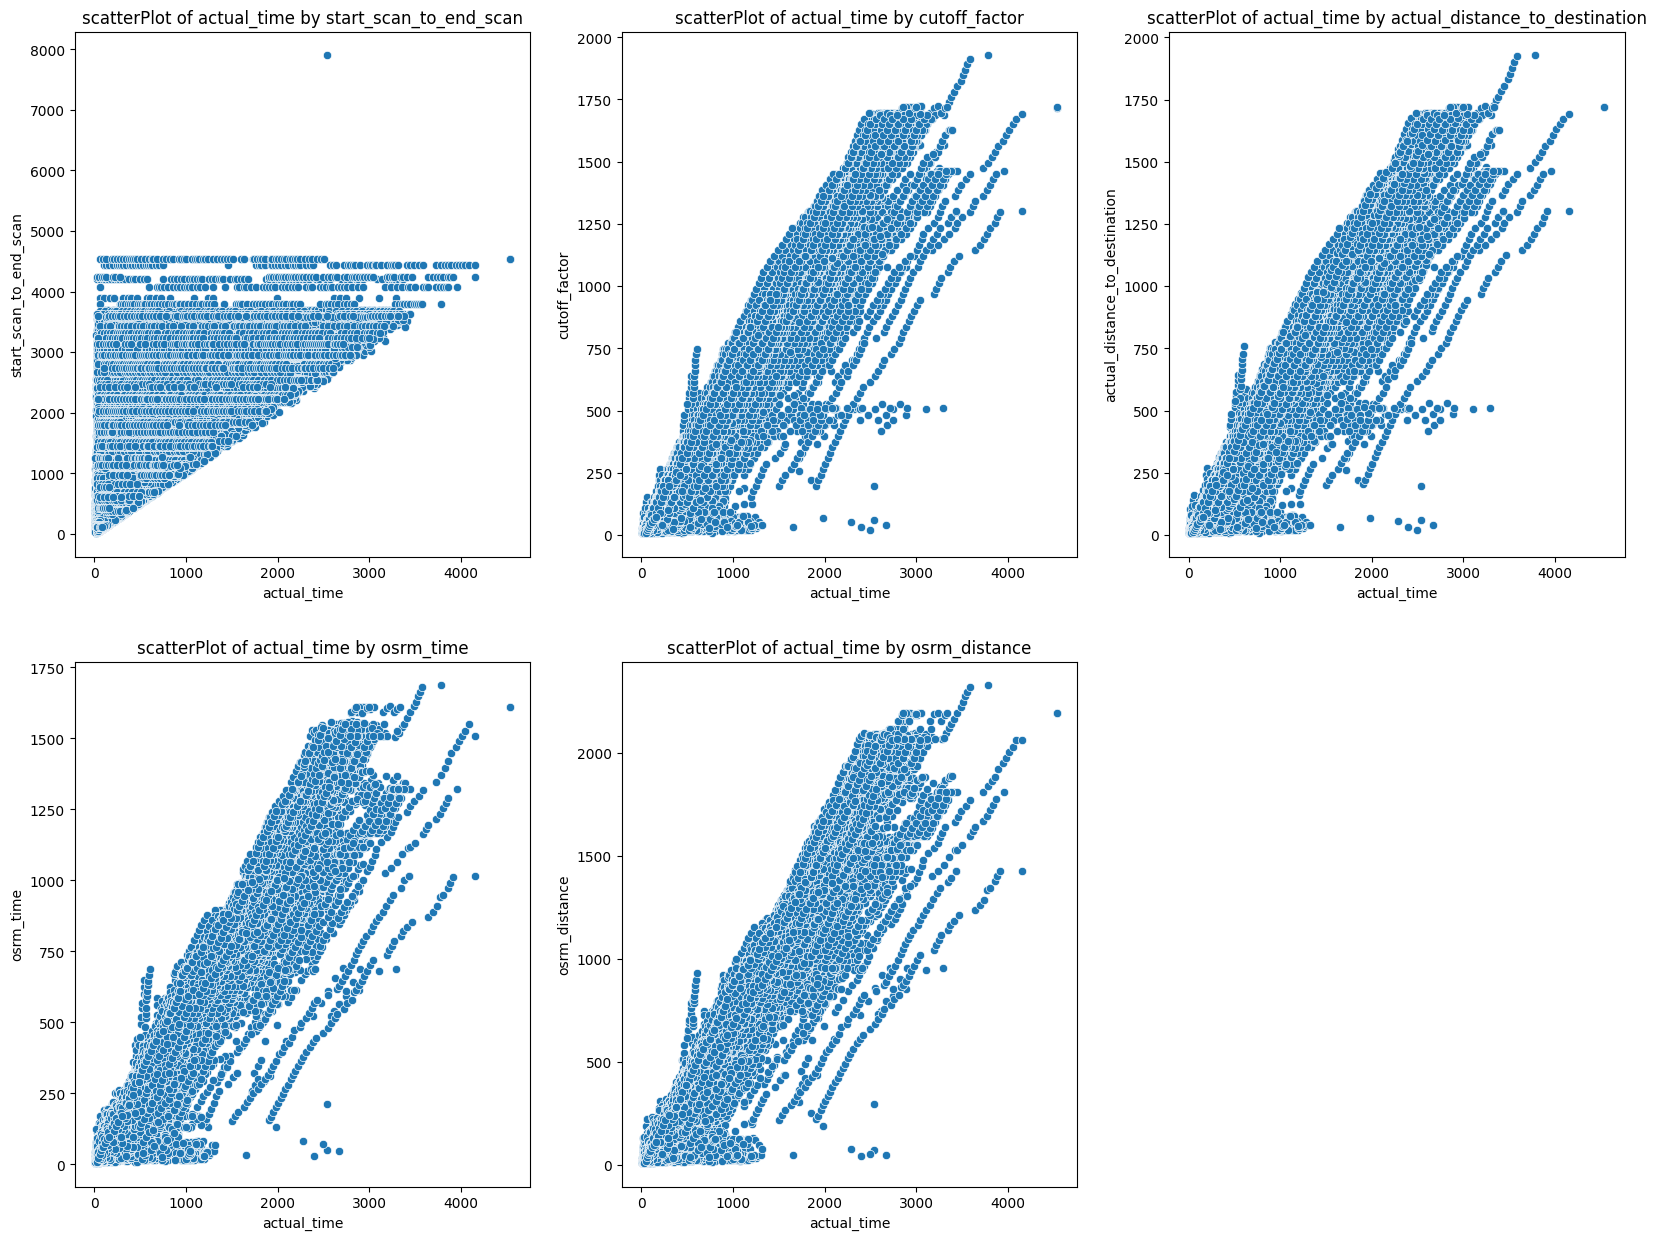

In [19]:
i = 1
plt.figure(figsize=(20, 15))
for col in select_num_cols[1:]:
    plt.subplot(2, 3, i)
    plot_bivariate_plot_NN(df, select_num_cols[0], col)
    i += 1
plt.show()

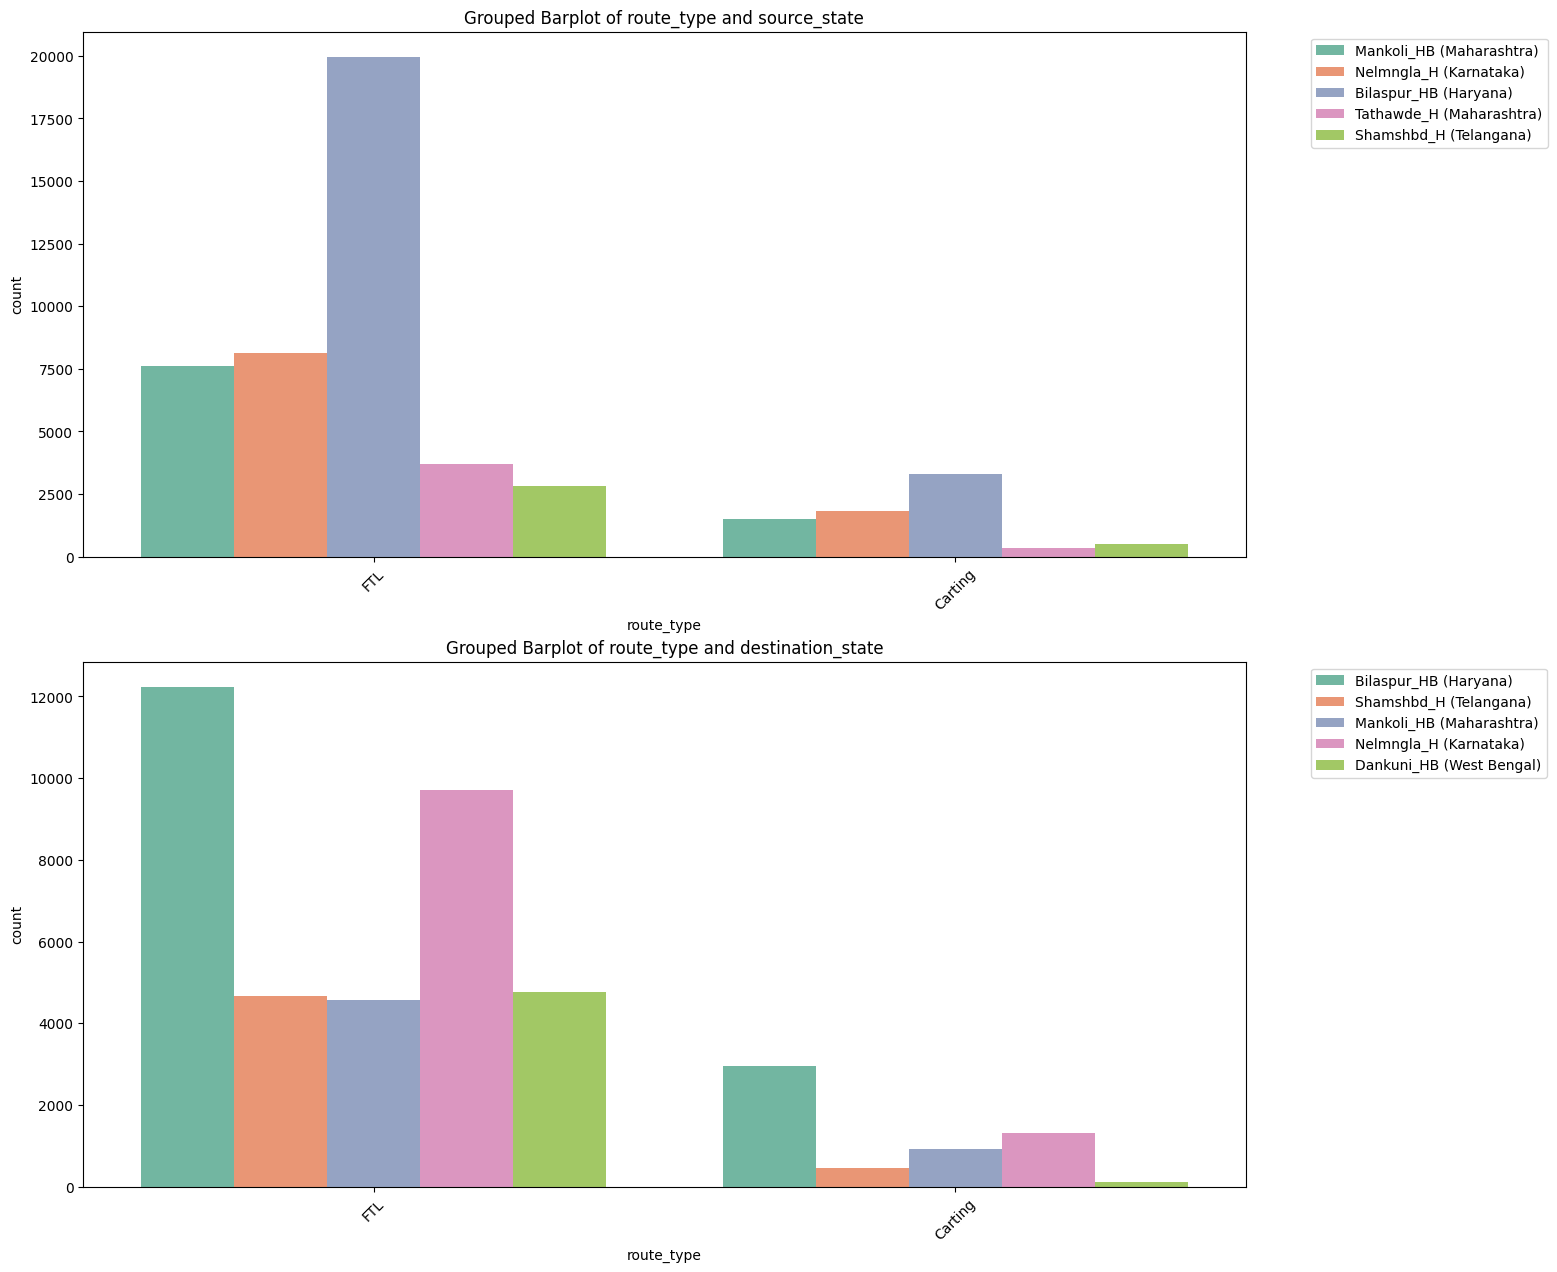

In [20]:
i = 1
plt.figure(figsize=(15, 15))
for col in select_cat_cols[1:]:
    plt.subplot(2, 1, i)
    plot_bivariate_plot_CC(df, select_cat_cols[0], col, rotation=45)  
    i += 1
plt.show()


#### Correlation

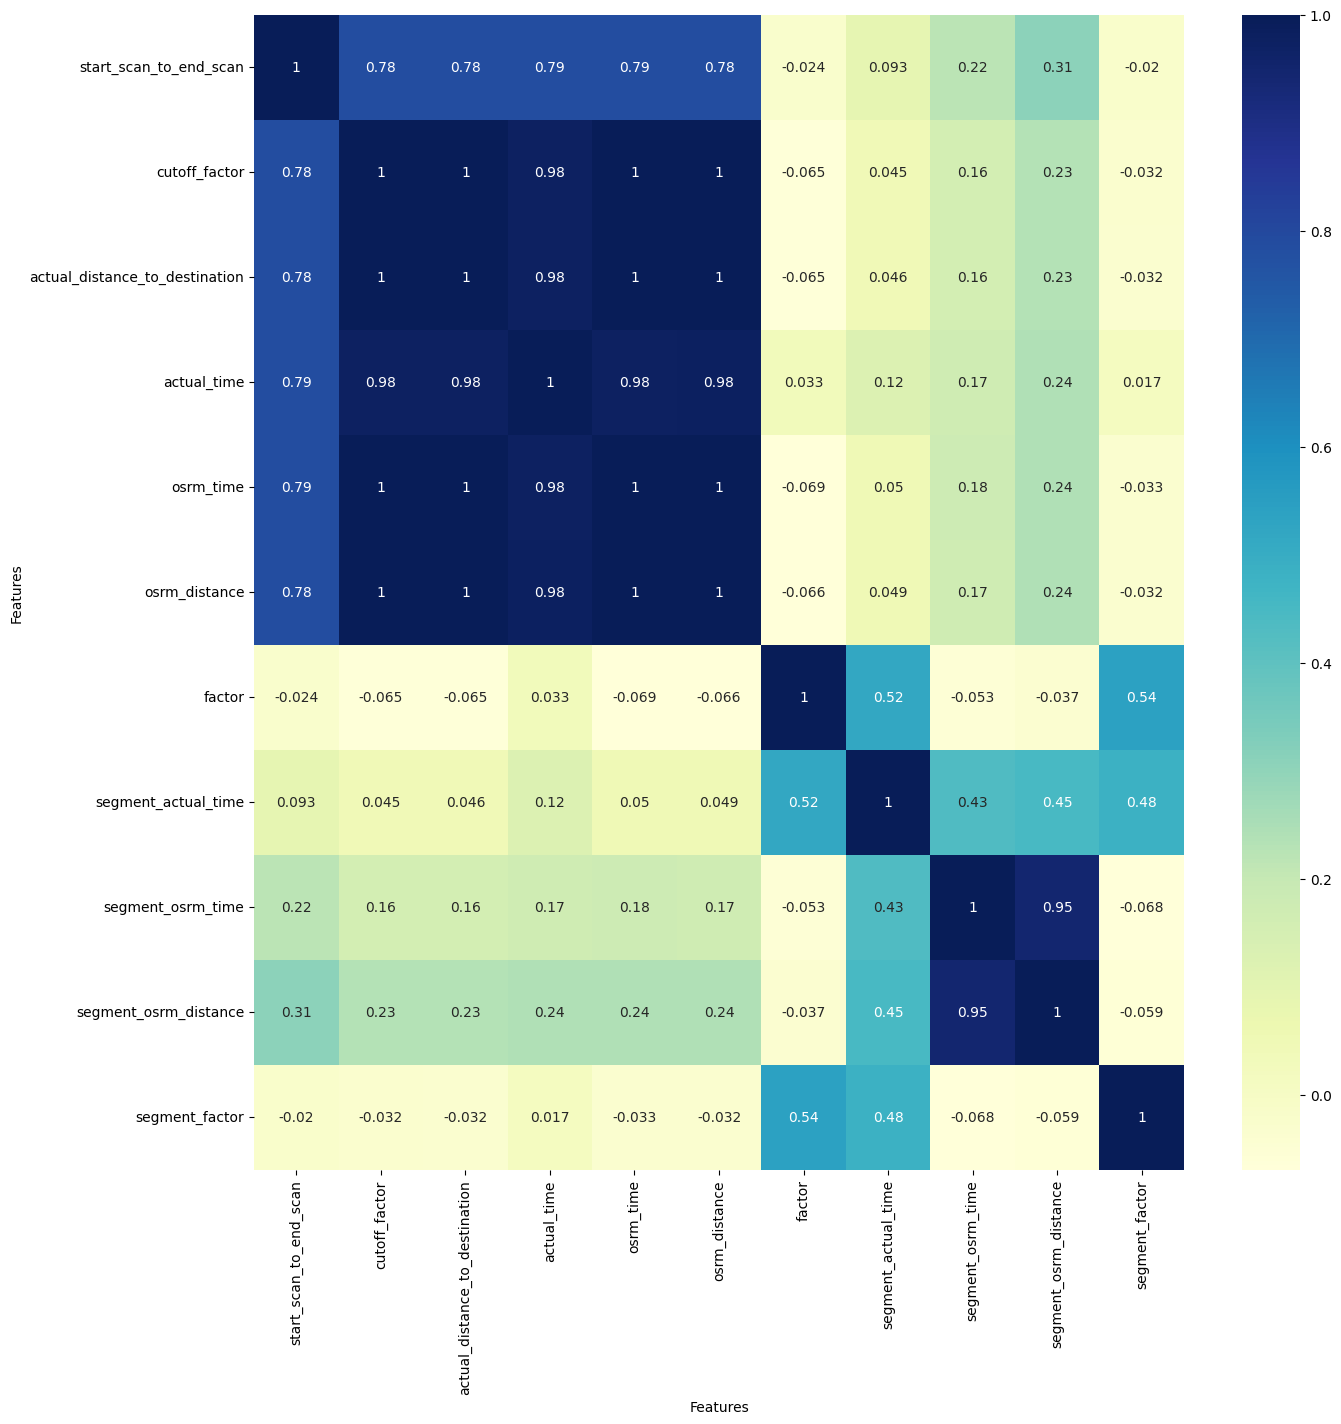

In [21]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


### Features 'start_scan_to_end_scan', 'cutoff_factor','actual_distance_to_destination', 'osrm_time','osrm_distance' all have high positive correlation among them

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


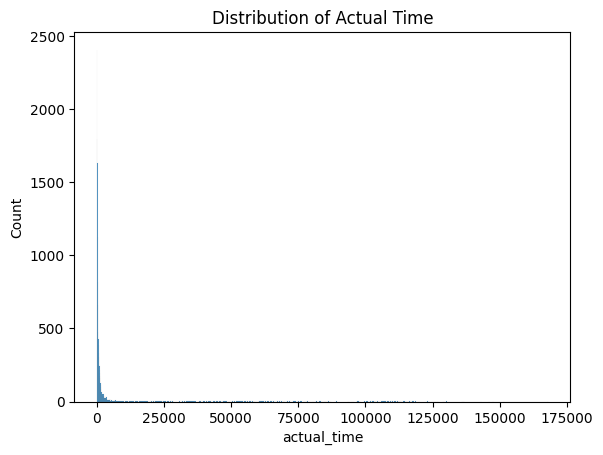

In [22]:

# Distribution of actual time
sns.histplot(aggregated_df['actual_time'])
plt.title('Distribution of Actual Time')
plt.show()



## Hypothesis Testing

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


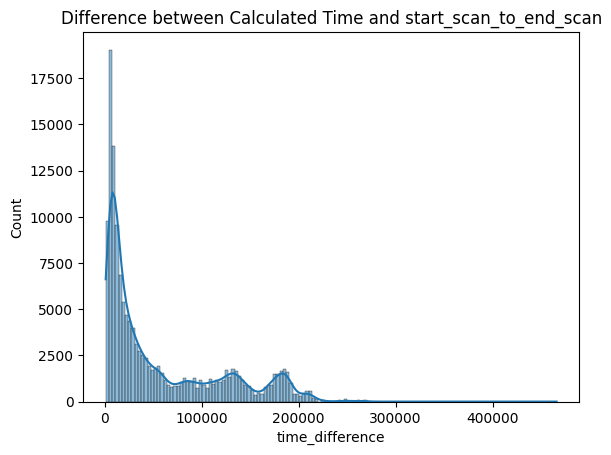

T-test result between time_taken and start_scan_to_end_scan: TtestResult(statistic=346.9235343778858, pvalue=0.0, df=288630.0)


In [23]:
# Perform hypothesis testing/visual analysis between calculated time and start_scan_to_end_scan
# H0 (Null Hypothesis): There is no significant difference between the means of time_taken and start_scan_to_end_scan.
# Ha (Alternative Hypothesis): There is a significant difference between the means of time_taken and start_scan_to_end_scan.
 
sns.histplot(df['time_difference'], kde=True)
plt.title('Difference between Calculated Time and start_scan_to_end_scan')
plt.show()

ttest_result_1 = ttest_ind(df['time_taken'], df['start_scan_to_end_scan'])
print(f'T-test result between time_taken and start_scan_to_end_scan: {ttest_result_1}')


### Since the p-value (0.0) is less than 0.05, we reject the null hypothesis (H0). This suggests that there is a significant difference between the means of time_taken and start_scan_to_end_scan.

T-test result between actual_time and osrm_time: TtestResult(statistic=14.05476572196875, pvalue=1.003515078231707e-44, df=29572.0)


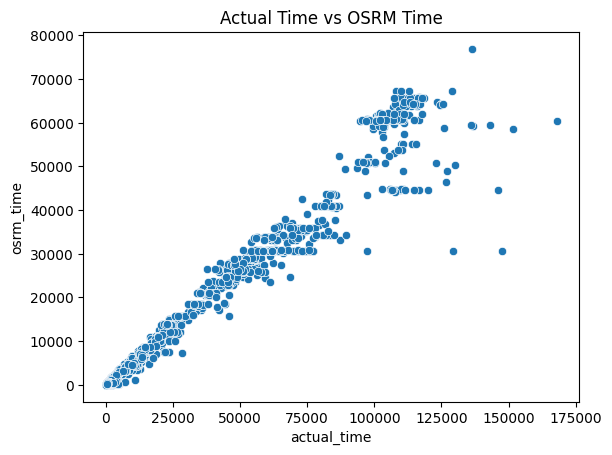

In [24]:
# H0 (Null Hypothesis): There is no significant difference between the means of actual_time and osrm_time.
# Ha (Alternative Hypothesis): There is a significant difference between the means of actual_time and osrm_time.

ttest_result_2 = ttest_ind(aggregated_df['actual_time'], aggregated_df['osrm_time'])
print(f'T-test result between actual_time and osrm_time: {ttest_result_2}')
# Relationship between actual_time and osrm_time
sns.scatterplot(x=aggregated_df['actual_time'], y=aggregated_df['osrm_time'])
plt.title('Actual Time vs OSRM Time')
plt.show()

### Since the p-value (1.003515078231707e-44) is less than 0.05, we reject the null hypothesis (H0). This indicates that there is a significant difference between the means of actual_time and osrm_time.

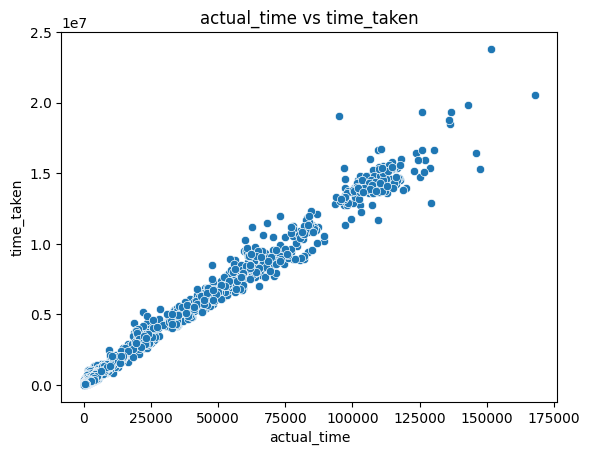

T-test result between actual_time and time_taken: TtestResult(statistic=-33.668192742859276, pvalue=6.859303598499063e-244, df=29572.0)


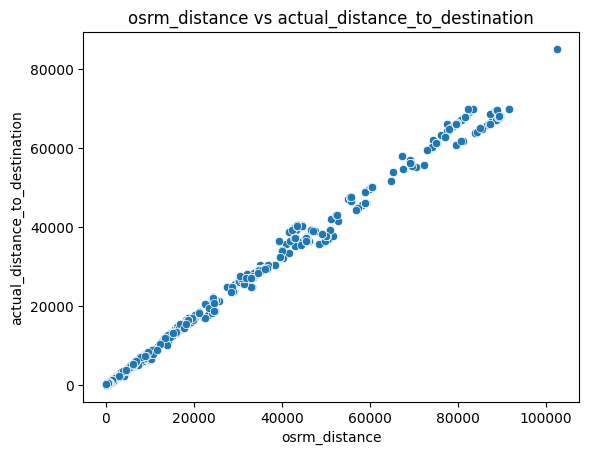

T-test result between osrm_distance and actual_distance_to_destination: TtestResult(statistic=4.337083561066268, pvalue=1.4486329729906885e-05, df=29572.0)


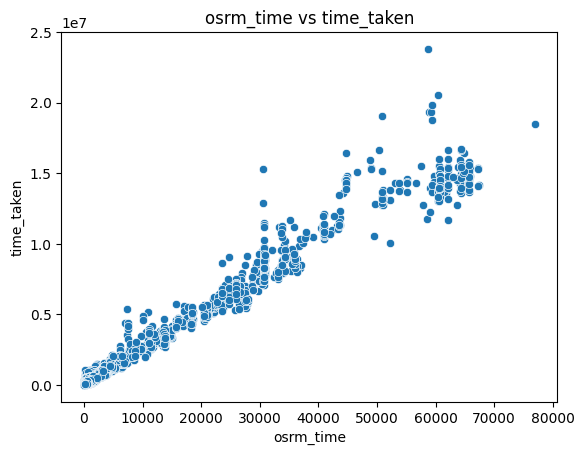

T-test result between osrm_time and time_taken: TtestResult(statistic=-33.788216115302205, pvalue=1.3861868853733896e-245, df=29572.0)


In [25]:
# Hypothesis testing/visual analysis for other comparisons
def hypothesis_test_and_plot(dataframe, col1, col2):
    sns.scatterplot(x=dataframe[col1], y=dataframe[col2])
    plt.title(f'{col1} vs {col2}')
    plt.show()
    ttest_result = ttest_ind(dataframe[col1], dataframe[col2])
    print(f'T-test result between {col1} and {col2}: {ttest_result}')

# Apply the function to required comparisons

# H0 (Null Hypothesis): There is no significant difference between the means of actual_time and time_taken.
# Ha (Alternative Hypothesis): There is a significant difference between the means of actual_time and time_taken.
hypothesis_test_and_plot(aggregated_df, 'actual_time', 'time_taken')

# H0 (Null Hypothesis): There is no significant difference between the means of osrm_distance and actual_distance_to_destination.
# Ha (Alternative Hypothesis): There is a significant difference between the means of osrm_distance and actual_distance_to_destination.
hypothesis_test_and_plot(aggregated_df, 'osrm_distance', 'actual_distance_to_destination')

# H0 (Null Hypothesis): There is no significant difference between the means of osrm_time and time_taken.
# Ha (Alternative Hypothesis): There is a significant difference between the means of osrm_time and time_taken.
hypothesis_test_and_plot(aggregated_df, 'osrm_time', 'time_taken')

- ### Since the p-value (6.859303598499063e-244) is less than 0.05, we reject the null hypothesis (H0). This suggests that there is a significant difference between the means of actual_time and time_taken.
- ### Since the p-value (1.4486329729906885e-05) is less than 0.05, we reject the null hypothesis (H0). This indicates that there is a significant difference between the means of osrm_distance and actual_distance_to_destination.
- ### Since the p-value (1.3861868853733896e-245) is less than 0.05, we reject the null hypothesis (H0). This suggests that there is a significant difference between the means of osrm_time and time_taken.

## Finding Outliers and Treatment

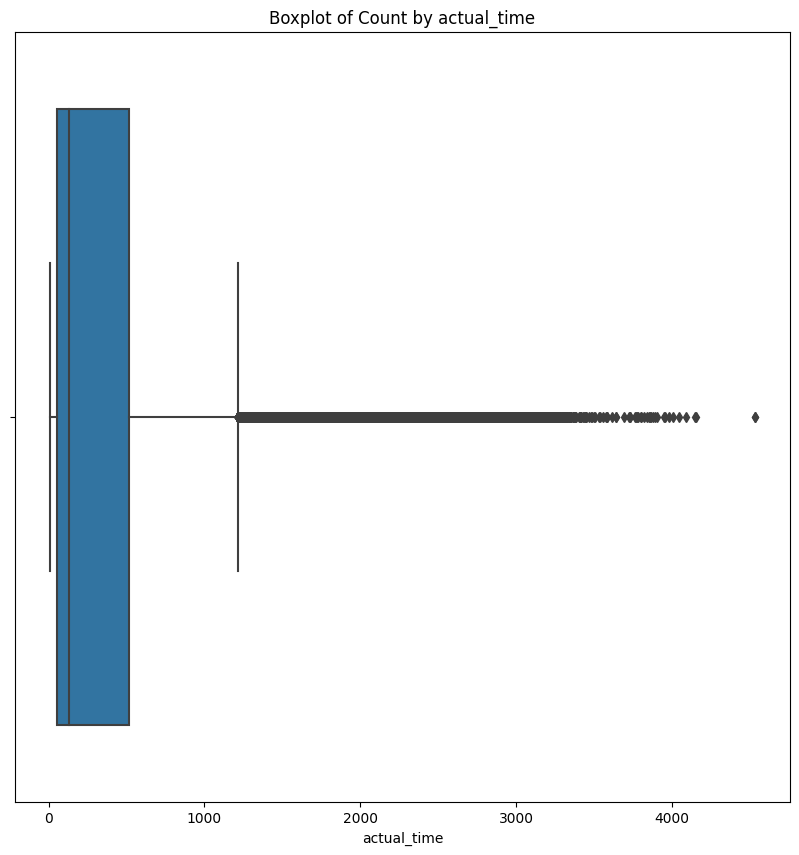

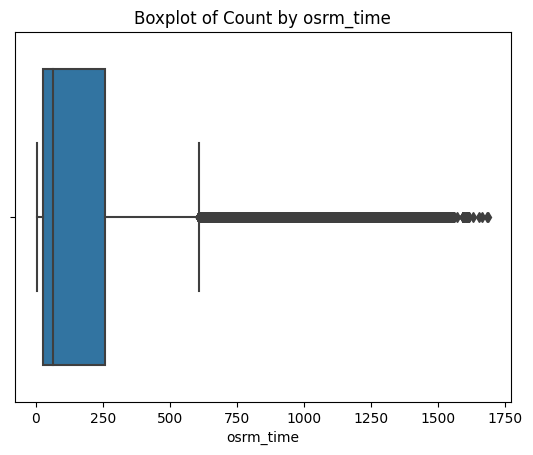

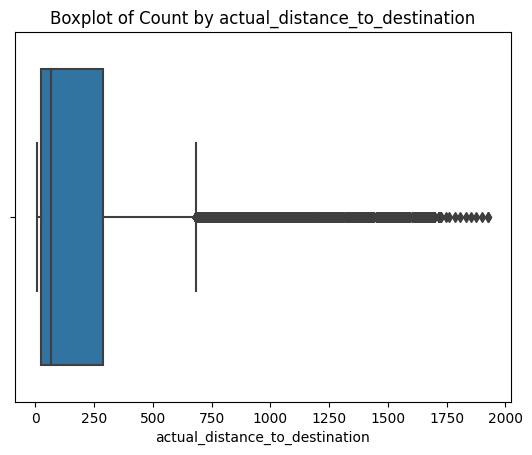

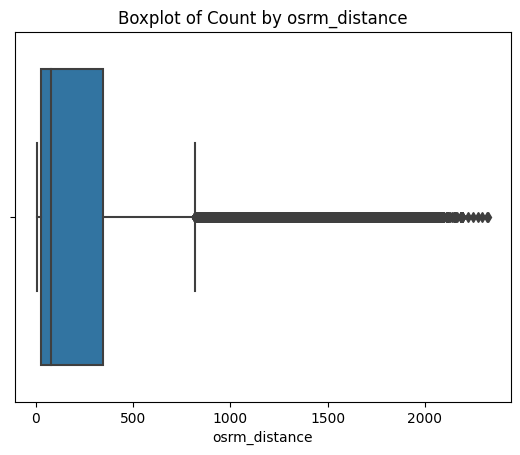

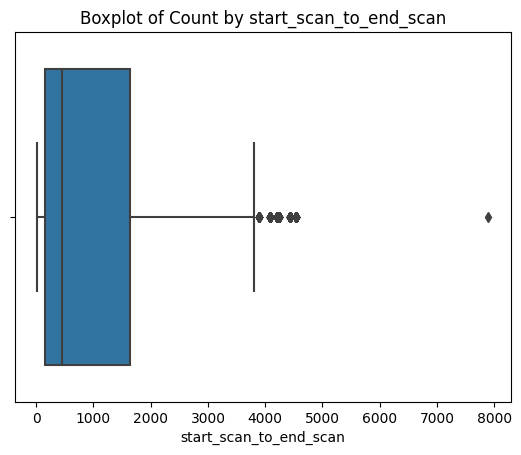

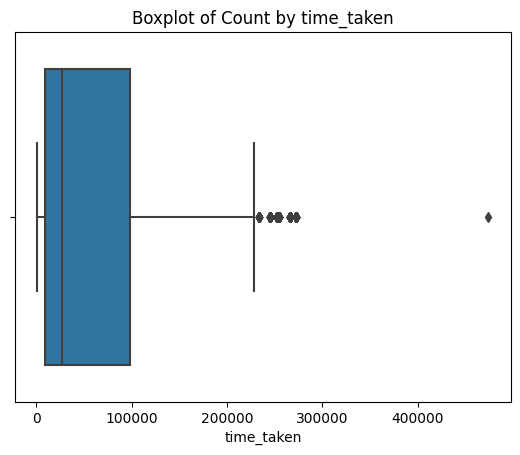

In [26]:
# Detect outliers
aggregated_df_num = aggregated_df.select_dtypes(include=np.number)
aggregated_df_num = aggregated_df_num[aggregated_df_num.columns[:-3]]
plt.figure(figsize=(10, 10))
for var in aggregated_df_num.columns:
    sns.boxplot(x=var, data=df)
    plt.title(f'Boxplot of Count by {var}')
    plt.show()



In [27]:
# Find outliers using the IQR method
def find_and_handle_outliers(dataframe, columns):
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        dataframe = dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]
    return dataframe

numerical_columns = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance', 'time_taken']
filtered_df = find_and_handle_outliers(aggregated_df, numerical_columns)

In [28]:
filtered_df.head()

,trip_uuid,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,time_taken,route_type,source_center,destination_center,trip_creation_year,trip_creation_month,trip_creation_day,source_state,destination_state
1,trip-153671042288605164,399.0,210.0,240.208306,269.4308,906.0,54790.444758,Carting,IND572101AAA,IND561203AAB,2018,9,12,Veersagr_I (Karnataka),ChikaDPP_D (Karnataka)
3,trip-153671046011330457,82.0,24.0,28.529648,31.6475,200.0,12059.392224,Carting,IND400072AAB,IND401104AAA,2018,9,12,Unknown,MiraRd_IP (Maharashtra)
4,trip-153671052974046625,556.0,207.0,239.007304,266.2914,1586.0,95322.659880,FTL,IND583101AAA,IND583201AAA,2018,9,12,Dc (Karnataka),Unknown
5,trip-153671055416136166,92.0,30.0,34.407865,38.1953,249.0,15081.947861,Carting,IND600116AAB,IND600056AAA,2018,9,12,Porur_DPC (Tamil Nadu),Poonamallee (Tamil Nadu)
6,trip-153671066201138152,24.0,13.0,9.100510,12.0184,98.0,5880.338041,Carting,IND600044AAD,IND600048AAA,2018,9,12,Chrompet_DPC (Tamil Nadu),Vandalur_Dc (Tamil Nadu)


## Encoding Categorical Variables

In [29]:
filtered_df.select_dtypes(include='object').nunique()

trip_uuid             10148
route_type                2
source_center           739
destination_center      898
source_state            655
destination_state       801
dtype: int64

In [30]:
# One-hot encoding
encoded_df = pd.get_dummies(filtered_df, columns=['route_type'])


## Normalization/Standardization

In [31]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
numerical_columns = ['actual_time', 'osrm_time', 'actual_distance_to_destination', 'osrm_distance']
encoded_df[numerical_columns] = scaler.fit_transform(encoded_df[numerical_columns])

# Display the processed DataFrame
encoded_df.head()

,trip_uuid,actual_time,osrm_time,actual_distance_to_destination,osrm_distance,start_scan_to_end_scan,time_taken,source_center,destination_center,trip_creation_year,trip_creation_month,trip_creation_day,source_state,destination_state,route_type_Carting,route_type_FTL
1,trip-153671042288605164,0.557651,0.798465,1.338076,1.077027,906.0,54790.444758,IND572101AAA,IND561203AAB,2018,9,12,Veersagr_I (Karnataka),ChikaDPP_D (Karnataka),True,False
3,trip-153671046011330457,-0.824265,-0.958499,-0.826426,-0.887459,200.0,12059.392224,IND400072AAB,IND401104AAA,2018,9,12,Unknown,MiraRd_IP (Maharashtra),True,False
4,trip-153671052974046625,1.242071,0.770127,1.325795,1.051091,1586.0,95322.659880,IND583101AAA,IND583201AAA,2018,9,12,Dc (Karnataka),Unknown,False,True
5,trip-153671055416136166,-0.780672,-0.901823,-0.766319,-0.833364,249.0,15081.947861,IND600116AAB,IND600056AAA,2018,9,12,Porur_DPC (Tamil Nadu),Poonamallee (Tamil Nadu),True,False
6,trip-153671066201138152,-1.077108,-1.062405,-1.025097,-1.049628,98.0,5880.338041,IND600044AAD,IND600048AAA,2018,9,12,Chrompet_DPC (Tamil Nadu),Vandalur_Dc (Tamil Nadu),True,False


## Business Insights and Recommendations

In [32]:
busiest_corridors = encoded_df.groupby(['source_state', 'destination_state']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)
busiest_corridors.head(10)

,source_state,destination_state,counts
825,Nelmngla_H (Karnataka),KGAirprt_HB (Karnataka),151
140,Bomsndra_HB (Karnataka),KGAirprt_HB (Karnataka),121
545,KGAirprt_HB (Karnataka),Nelmngla_H (Karnataka),108
704,Mankoli_HB (Maharashtra),Unknown,105
821,Nelmngla_H (Karnataka),Bomsndra_HB (Karnataka),102
290,Chndivli_PC (Maharashtra),Mankoli_HB (Maharashtra),99
1077,Tathawde_H (Maharashtra),Unknown,92
540,KGAirprt_HB (Karnataka),Bomsndra_HB (Karnataka),86
695,Mankoli_HB (Maharashtra),MiraRd_IP (Maharashtra),78
143,Bomsndra_HB (Karnataka),Nelmngla_H (Karnataka),76


In [33]:
data = busiest_corridors.head(30)
data = data[~((data['source_state']=='Unknown') | (data['destination_state']=='Unknown'))]
data.head(10)

,source_state,destination_state,counts
825,Nelmngla_H (Karnataka),KGAirprt_HB (Karnataka),151
140,Bomsndra_HB (Karnataka),KGAirprt_HB (Karnataka),121
545,KGAirprt_HB (Karnataka),Nelmngla_H (Karnataka),108
821,Nelmngla_H (Karnataka),Bomsndra_HB (Karnataka),102
290,Chndivli_PC (Maharashtra),Mankoli_HB (Maharashtra),99
540,KGAirprt_HB (Karnataka),Bomsndra_HB (Karnataka),86
695,Mankoli_HB (Maharashtra),MiraRd_IP (Maharashtra),78
143,Bomsndra_HB (Karnataka),Nelmngla_H (Karnataka),76
850,Okhla_PC (Delhi),Bilaspur_HB (Haryana),75
1073,Tathawde_H (Maharashtra),Mankoli_HB (Maharashtra),64


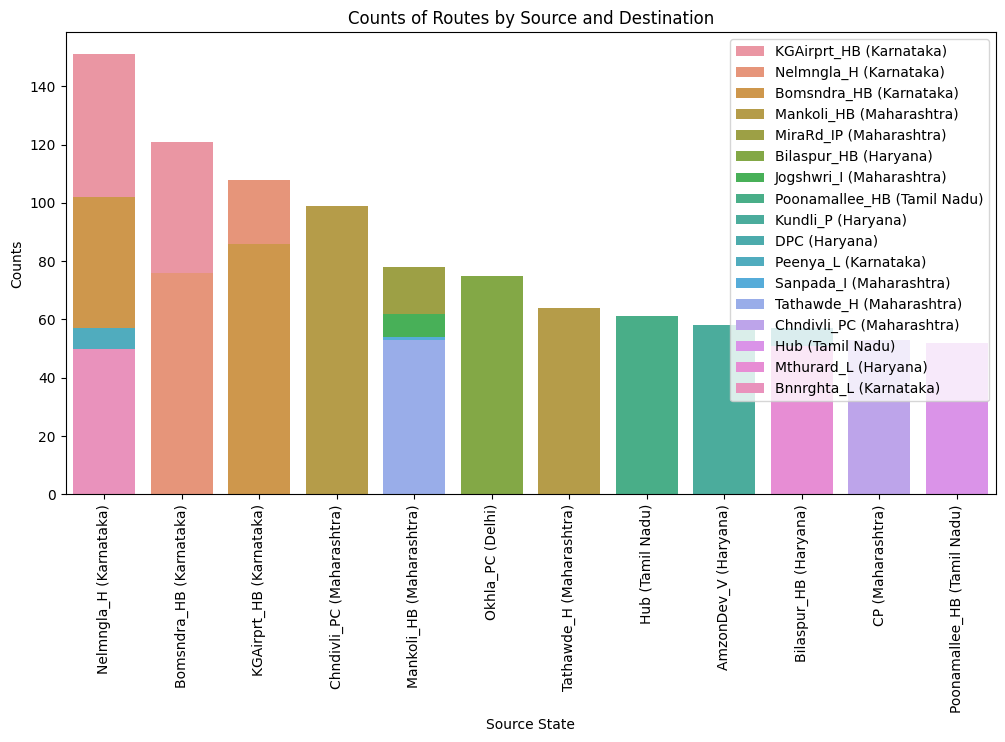

In [34]:
# Bar plot

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='source_state', y='counts', hue='destination_state', dodge=False)
plt.xticks(rotation=90)
plt.title('Counts of Routes by Source and Destination')
plt.ylabel('Counts')
plt.xlabel('Source State')
plt.legend(loc='upper right')
plt.show()

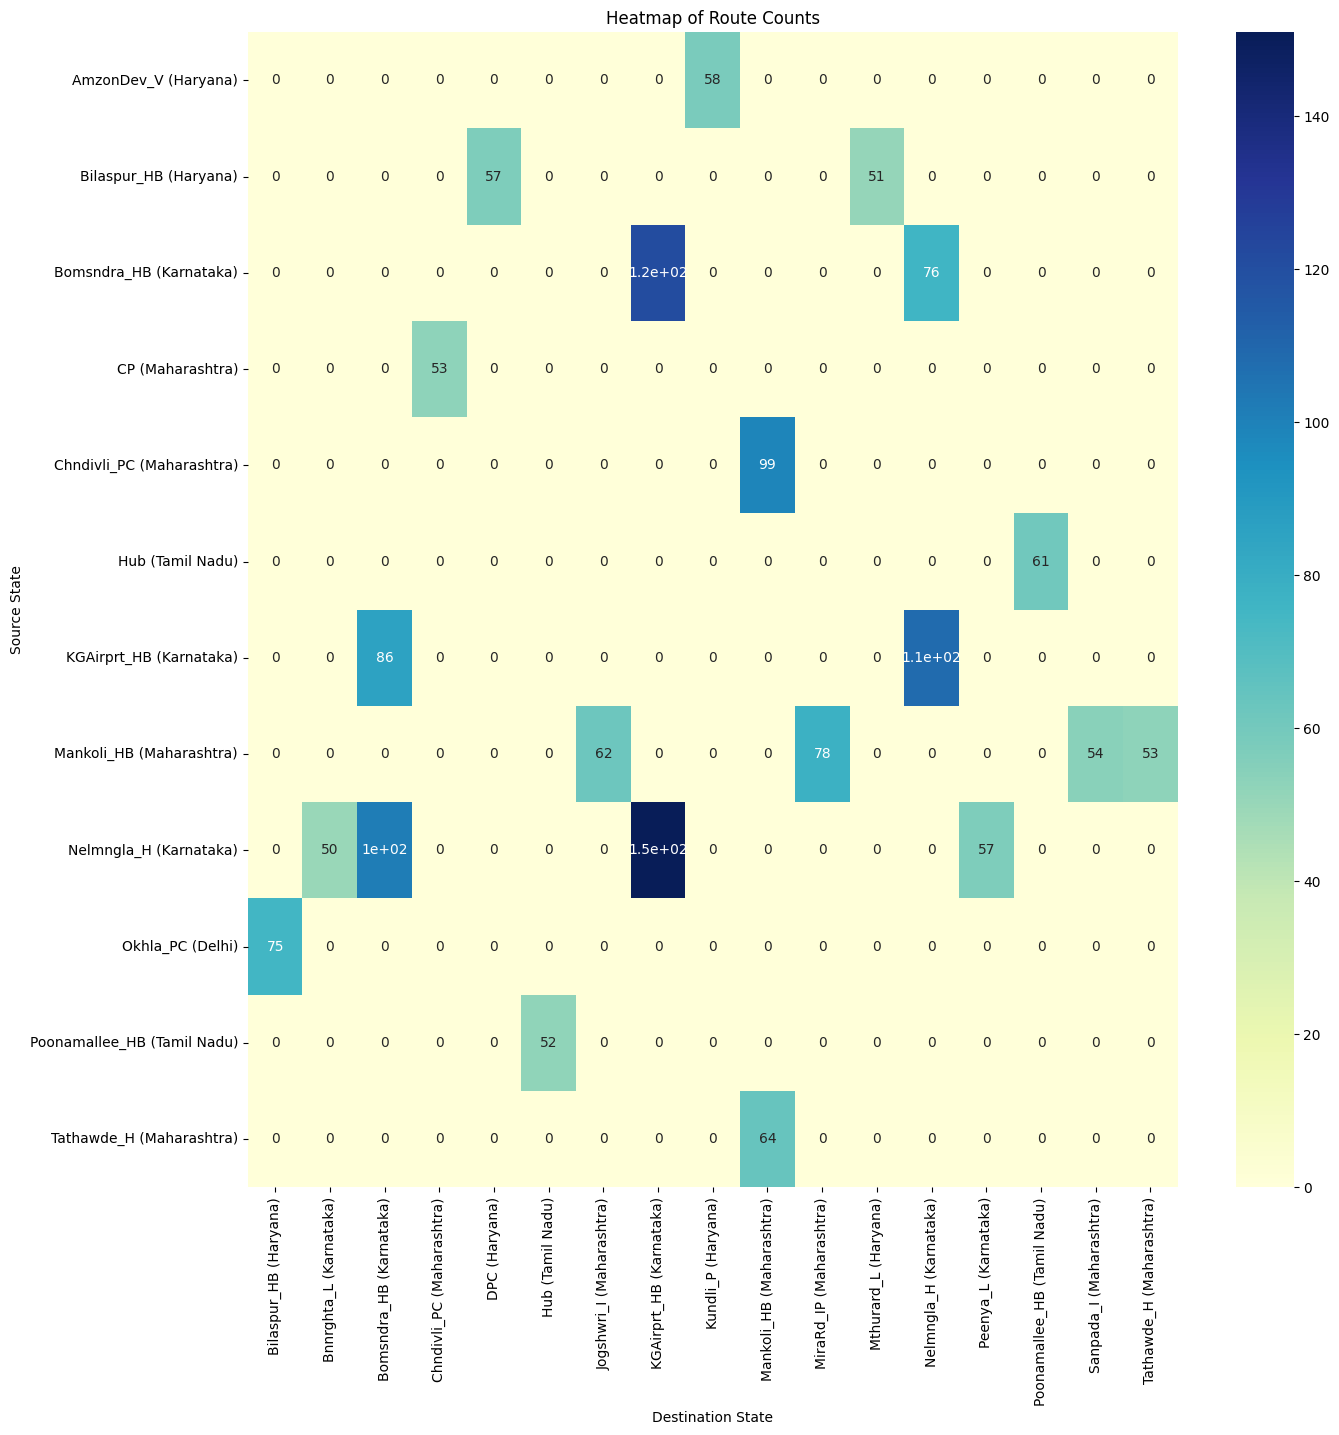

In [35]:
# Pivot table for heatmap
pivot_df = data.pivot_table(index='source_state', columns='destination_state', values='counts', fill_value=0)

# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(pivot_df, annot=True, cmap="YlGnBu")
plt.title('Heatmap of Route Counts')
plt.xlabel('Destination State')
plt.ylabel('Source State')
plt.show()


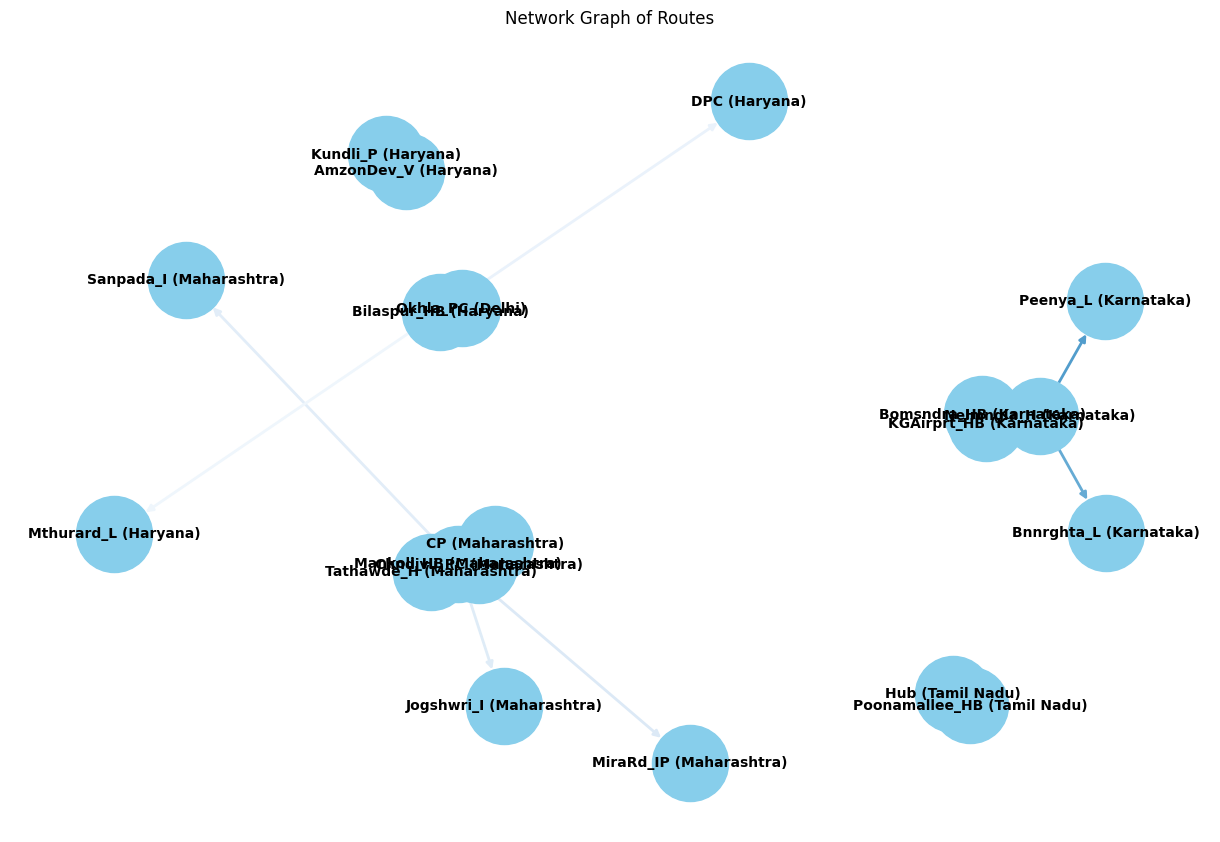

In [36]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges
for i, row in data.iterrows():
    G.add_edge(row['source_state'], row['destination_state'], weight=row['counts'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold", edge_color=data['counts'], edge_cmap=plt.cm.Blues, width=2)
plt.title('Network Graph of Routes')
plt.show()


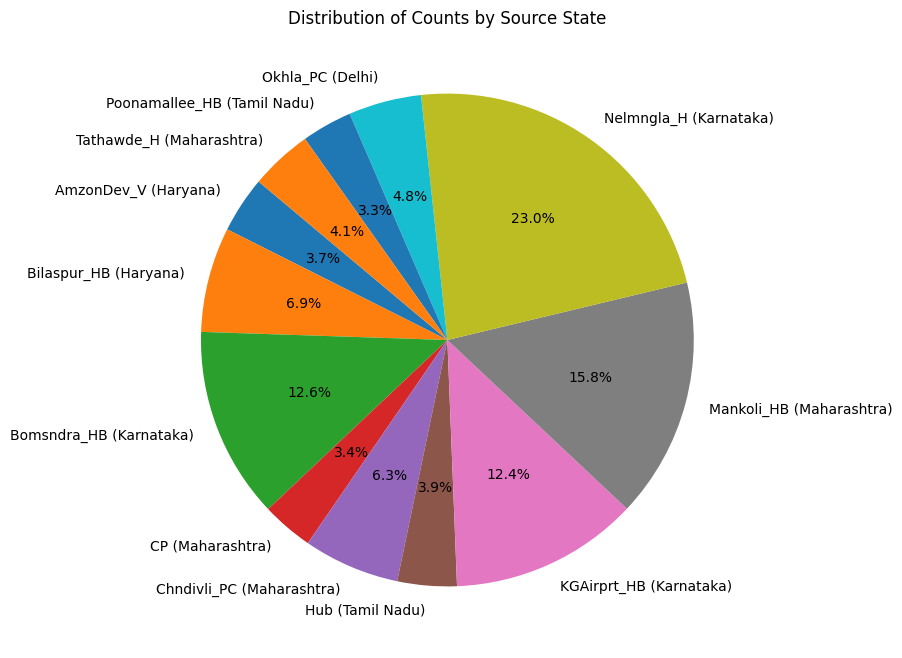

In [37]:
# Pie chart
source_counts = data.groupby('source_state')['counts'].sum()
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Counts by Source State')
plt.show()


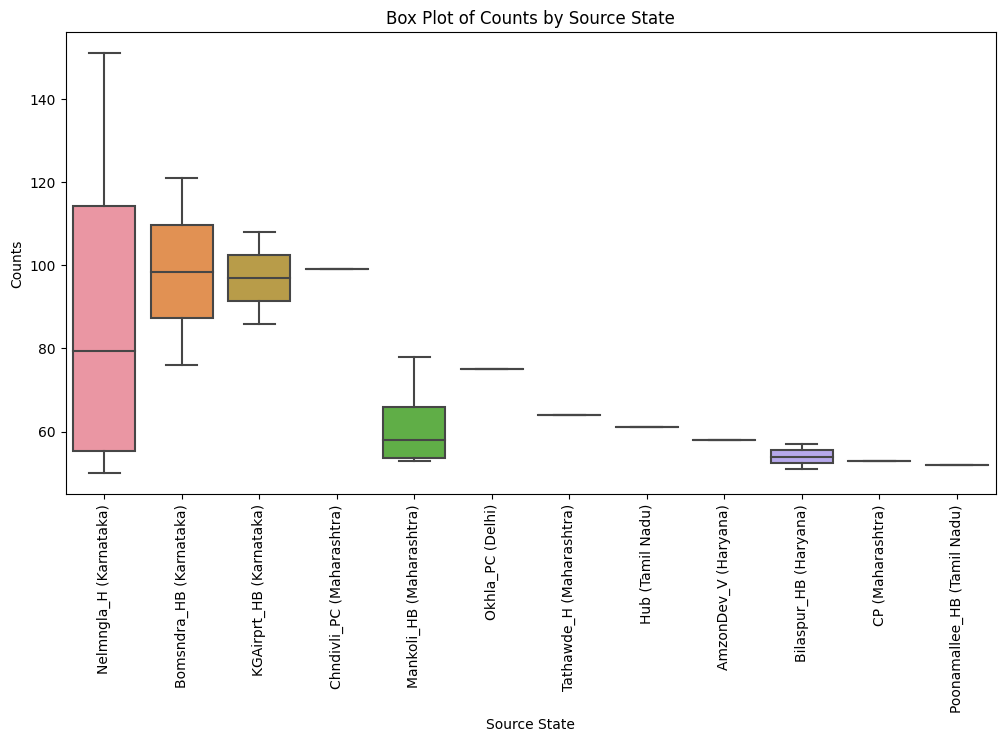

In [38]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='source_state', y='counts')
plt.xticks(rotation=90)
plt.title('Box Plot of Counts by Source State')
plt.xlabel('Source State')
plt.ylabel('Counts')
plt.show()


## Recommendations

- **Optimize Routes:** Focus on the busiest corridors, which are to optimize routes and reduce delivery times. Peak of these are **Nelmngla_H (Karnataka), Bomsndra_HB (Karnataka), Chndivli_PC (Maharashtra), KGAirprt_HB (Karnataka), MiraRd_IP (Maharashtra), Okhla_PC (Delhi), Nelmngla_H (Karnataka)**
- **Resource Allocation:** Allocate more resources to states with the highest order volumes, which are **Karnataka, Maharastra, Haryana, TamilNadu** and **Delhi**.
- **Technology Integration:** Enhance the routing engine's accuracy to better predict delivery times.